In [1]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
from sklearn.model_selection import train_test_split


In [2]:
file_dir = '/content/drive/My Drive/natural_images'

In [21]:
categories = os.listdir(file_dir)
class_num = len(os.listdir(file_dir))
print(categories)
print('Total number of class:', class_num)

['fruit', 'cat', 'airplane', 'car', 'person', 'flower', 'motorbike', 'dog']
Total number of class: 8


# Data Visualisation

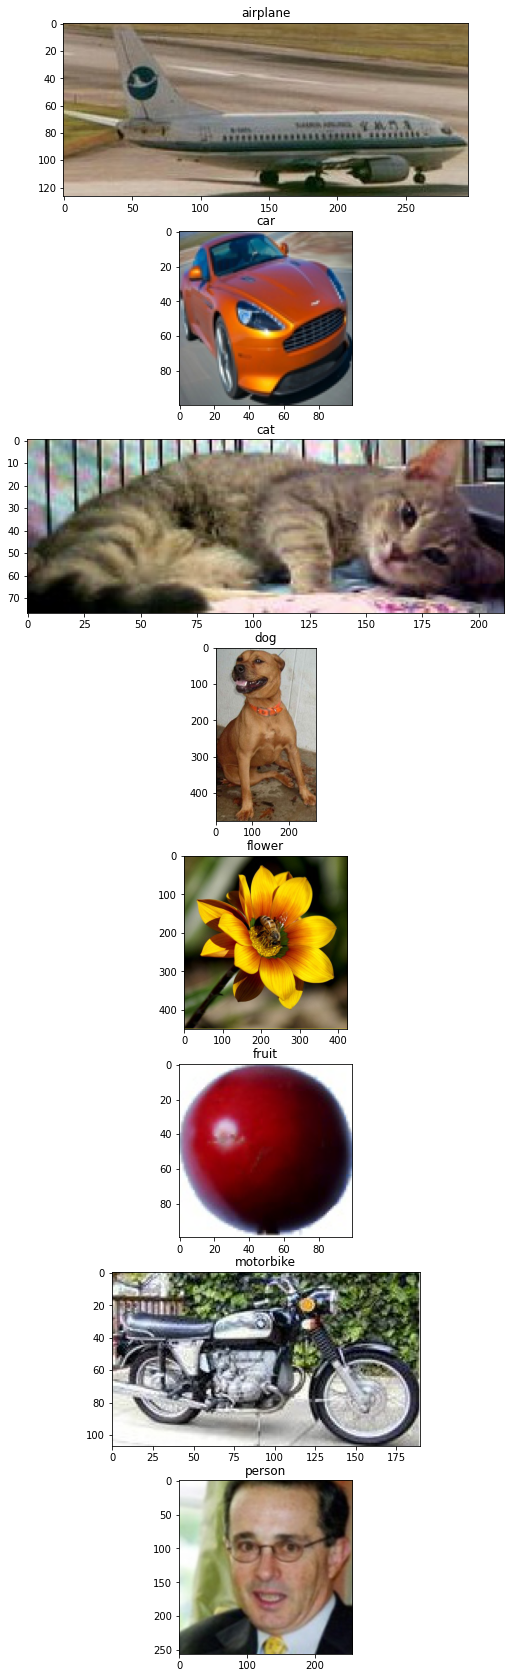

In [30]:
fig = plt.figure(figsize=(15,30))
for root, folders, filenames in os.walk(file_dir):
    num_image = 0
    num_folders = len(folders)
    for folder in sorted(folders):
        num_image +=1
        file_name = os.listdir(os.path.join(root,folder))[0]
        file_path = os.path.join(root,folder, file_name)
        image = mp_image.imread(file_path)
        a = fig.add_subplot(num_folders, 1, num_image)
        image_plot = plt.imshow(image)
        a.set_title(folder)
plt.show()

In [16]:
num = []
for category in categories:
    path = '/content/drive/My Drive/natural_images/{0}/'.format(category)
    a = 0
    print('\n', category.upper(),':')
    for image in os.listdir(path):
            (path+image)
            a = a+1
    num.append(a)
    print(category.upper(), 'class contains', a, 'images.')


 FRUIT :
FRUIT class contains 1040 images.

 CAT :
CAT class contains 885 images.

 AIRPLANE :
AIRPLANE class contains 727 images.

 CAR :
CAR class contains 968 images.

 PERSON :
PERSON class contains 986 images.

 FLOWER :
FLOWER class contains 843 images.

 MOTORBIKE :
MOTORBIKE class contains 793 images.

 DOG :
DOG class contains 702 images.


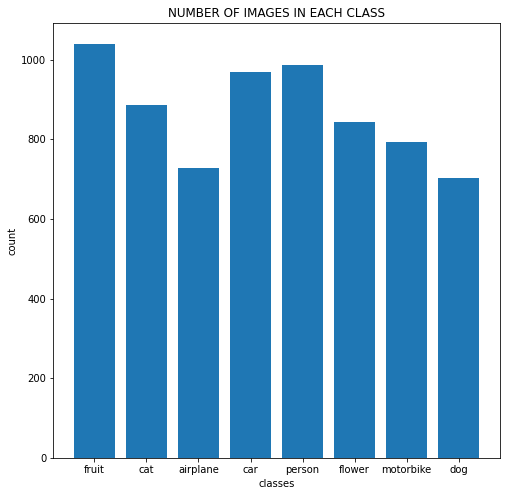

In [17]:
plt.figure(figsize = (8,8))
plt.bar(categories, num)
plt.title('NUMBER OF IMAGES IN EACH CLASS')
plt.xlabel('classes')
plt.ylabel('count')
plt.show()

# Generating Dataset from Images

In [ ]:
width_image = 108
height_image = 72

In [ ]:
def generate_data():
    dataset = []
    for category in categories:
        path = f'/content/drive/My Drive/natural_images/{category}'
        class_id = categories.index(category)
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_COLOR)
                image_array = cv2.resize(image_array, (width_image ,height_image))
                dataset.append([image_array, class_id])
            except Exception as e:
                print(e)
    return dataset

In [ ]:
dataset = generate_data()

# Splitting  and Changing X and Y 

In [ ]:
  x1 = []
  y1 = []
  
  for features, label in dataset:
    x1.append(features)
    y1.append(label)

In [ ]:
x1 = np.array(x1)
y1 = np.array(y1)
print('the shape of X is: ', x1.shape, 'and that of Y is: ', y1.shape)

the shape of X is:  (6944, 72, 108, 3) and that of Y is:  (6944,)


In [ ]:
#stadardizing the input data
x1 = x1.astype('float32')/255

In [ ]:
#converting the y_data into categorical:
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(y1)
from keras.utils import to_categorical
y_categorical = to_categorical(y_encoded)

In [ ]:
#lets shuffle all the data we have:
r = np.arange(x1.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x1[r]
Y = y_categorical[r]

# Splitting Train & Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

# Model Training

In [ ]:
from keras import models, layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape= (height_image,width_image,3)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 68, 104, 32)       2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 34, 52, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 25, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 25, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)              

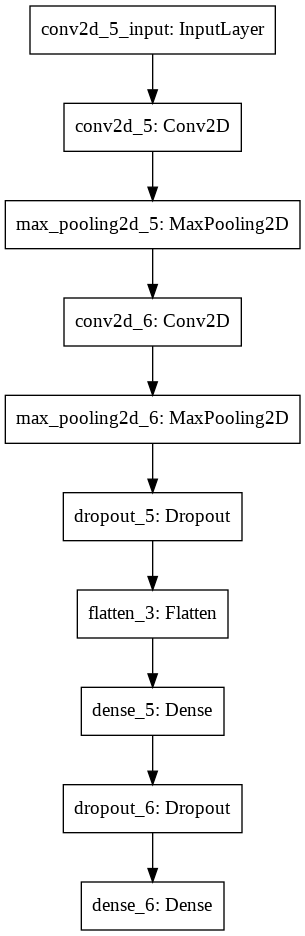

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
#fitting the model
history = model.fit(X_train, Y_train, epochs=25, validation_split=0.2)

Train on 3721 samples, validate on 931 samples
Epoch 1/25
3721/3721 [==============================] - 46s 12ms/step - loss: 0.9858 - accuracy: 0.6520 - val_loss: 0.4289 - val_accuracy: 0.8518
Epoch 2/25
3721/3721 [==============================] - 46s 12ms/step - loss: 0.4049 - accuracy: 0.8498 - val_loss: 0.3826 - val_accuracy: 0.8453
Epoch 3/25
3721/3721 [==============================] - 45s 12ms/step - loss: 0.2684 - accuracy: 0.9016 - val_loss: 0.3120 - val_accuracy: 0.8765
Epoch 4/25
3721/3721 [==============================] - 45s 12ms/step - loss: 0.2036 - accuracy: 0.9280 - val_loss: 0.3065 - val_accuracy: 0.8797
Epoch 5/25
3721/3721 [==============================] - 46s 12ms/step - loss: 0.1586 - accuracy: 0.9382 - val_loss: 0.2870 - val_accuracy: 0.9023
Epoch 6/25
3721/3721 [==============================] - 45s 12ms/step - loss: 0.1164 - accuracy: 0.9567 - val_loss: 0.2806 - val_accuracy: 0.9033
Epoch 7/25
3721/3721 [==============================] - 46s 12ms/step - loss:

# Model Prediction

In [ ]:
Y_pred = model.predict_classes(X_test)

In [ ]:
#converting over Y test to actual labels.
Y_test = np.argmax(Y_test, axis = 1)

In [ ]:
from sklearn.metrics import accuracy_score
print('The accuracy of the test set is:', accuracy_score(Y_pred,Y_test)*100)

The accuracy of the test set is: 89.3979057591623


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       333
           1       0.70      0.80      0.75       299
           2       0.94      0.92      0.93       252
           3       0.98      0.91      0.94       301
           4       0.97      0.99      0.98       299
           5       0.85      0.93      0.89       276
           6       0.99      0.99      0.99       283
           7       0.72      0.54      0.62       249

    accuracy                           0.89      2292
   macro avg       0.89      0.89      0.89      2292
weighted avg       0.89      0.89      0.89      2292



# Plotting Model Analysis

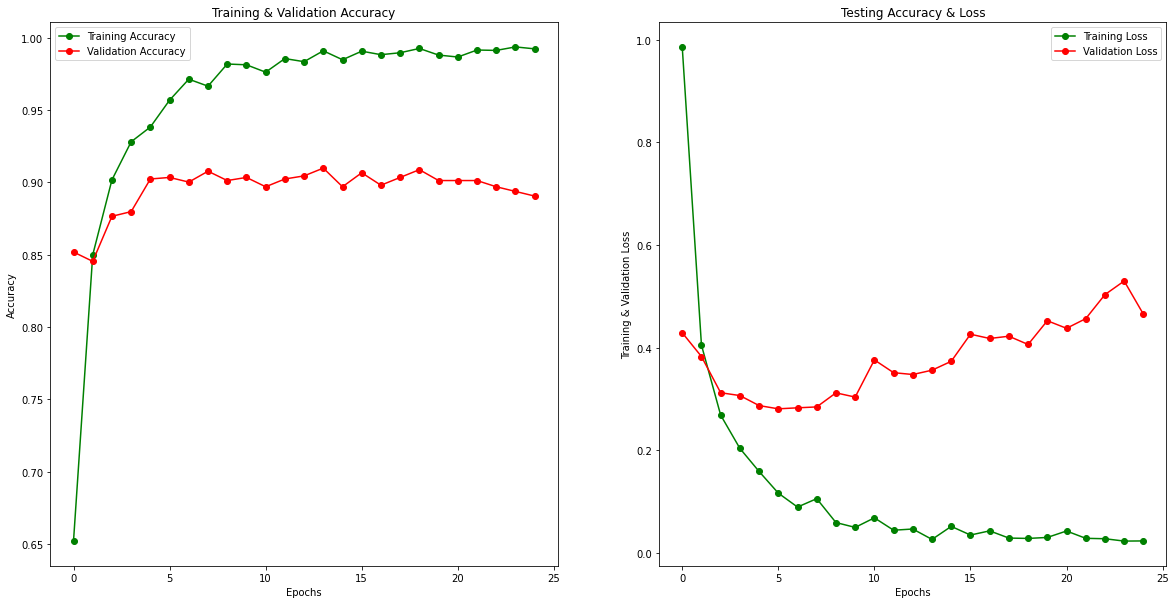

In [ ]:
epochs = [i for i in range(25)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()